In [1]:
#Importing packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Getting the details of files in the given directory path
import os
for dirname, _, filenames in os.walk("supermarket.csv"):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [3]:
#Reading data into a variable
data = pd.read_csv('supermarket.csv')


In [7]:
#Displaying 1st 5 rows
data.head(5)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [8]:
#Displaying the count of rows & columns
data.shape

(1000, 17)

In [9]:
#Details of each column 
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [10]:
#outputing the statistical values of the data
data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905e+00,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,6.131498e-14,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905e+00,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905e+00,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905e+00,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905e+00,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905e+00,49.650000,10.00000


In [11]:
#Determining the null values
data.isna().sum()


Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [12]:
#determining the duplicate
data.duplicated().sum()

0

In [13]:
#column names
data.columns


Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [14]:
#Determining the data type of column
data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [20]:
#creating a function for displaying a piechart for the given data
def display_pie_chart(values, labels, title, chart_type = 'pie'):
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot()
    if chart_type == 'doughnat':
        explode = np.full(len(labels), 0.05)
        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90, explode = explode, pctdistance=0.85)
        centre_circle = plt.Circle((0, 0), 0.70, fc='white')
        fig = plt.gcf()
        fig.gca().add_artist(centre_circle)
    else:
        ax.pie(values, labels=labels, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')  
    ax.set_title(title)
    plt.savefig(f'{labels[0]}', bbox_inches='tight')
plt.show()

In [24]:
#grouping the columns
def group_by_column(df, col, function):
    grouped_df = df.groupby(col).agg(function).reset_index()
    grouped_df = grouped_df.set_index(col)
    return grouped_df


             Total
Gender            
Female  167882.925
Male    155083.824


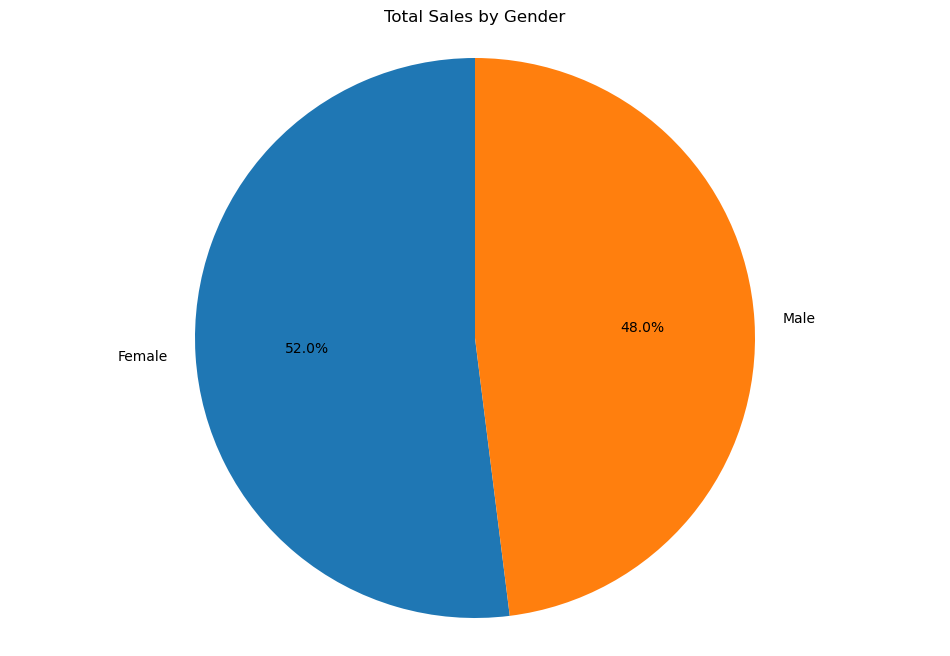

In [26]:
#generating piechart differentiated by gender
gender_and_total = data[['Gender', 'Total']]

grouped_by_gender_df = group_by_column(gender_and_total, 'Gender', 'sum')

print(grouped_by_gender_df)

labels = grouped_by_gender_df.index
values = grouped_by_gender_df['Total']

display_pie_chart(values, labels, 'Total Sales by Gender')

                    Total
Customer type            
Member         164223.444
Normal         158743.305


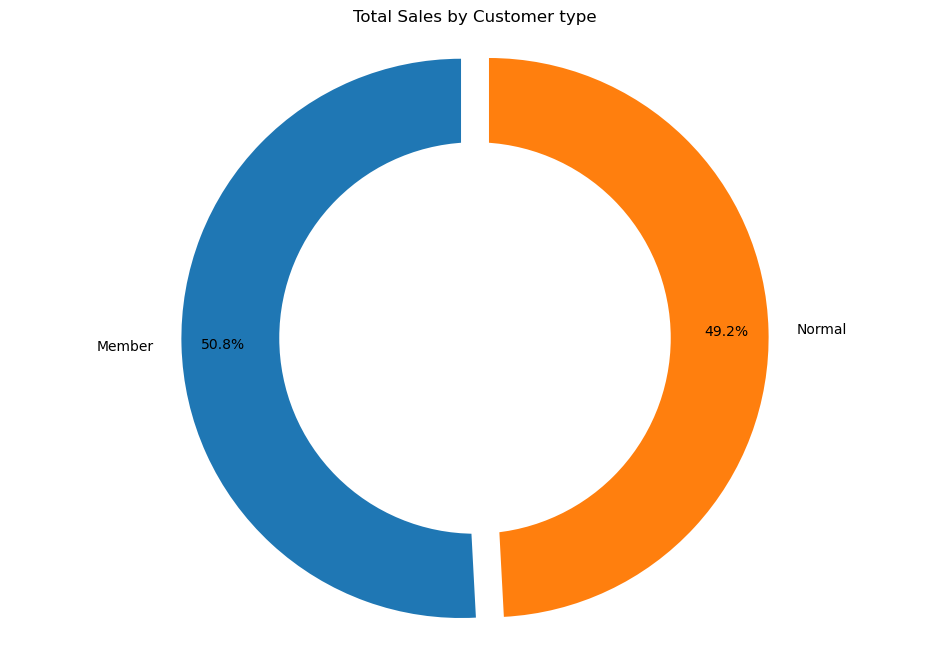

In [27]:
#creating a doughnat piechart based on the customer type
group_by_type = data[['Customer type', 'Total']]

group_by_type_df = group_by_column(group_by_type, 'Customer type', 'sum')

print(group_by_type_df)

labels = group_by_type_df.index
values = group_by_type_df['Total']

display_pie_chart(values, labels, 'Total Sales by Customer type', chart_type = 'doughnat')


In [28]:
#generating 5 rows of grouped data formed
group = data.groupby(['Product line', 'Gender']).size().reset_index()
group.columns = ['Product line', 'Gender', 'Count']

group.head(5)

,Product line,Gender,Count
0,Electronic accessories,Female,84
1,Electronic accessories,Male,86
2,Fashion accessories,Female,96
3,Fashion accessories,Male,82
4,Food and beverages,Female,90


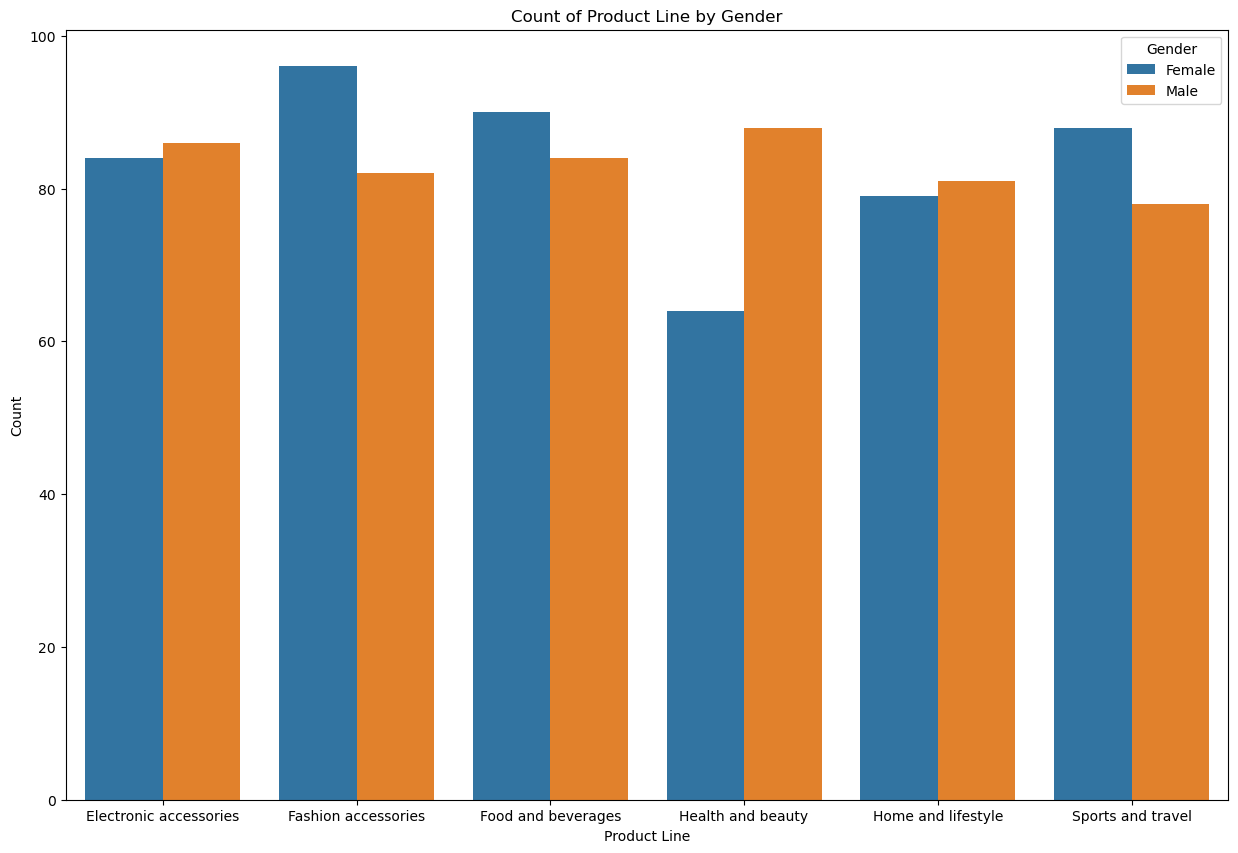

In [29]:
#creating barplot
plt.figure(figsize=(15, 10))


sns.barplot(data=group, x="Product line", y="Count", hue="Gender")
plt.title('Count of Product Line by Gender')
plt.xlabel('Product Line')
plt.ylabel('Count')
plt.savefig('count_by_gender')
plt.show()

In [30]:
#identifying the cities
data.City.unique()

array(['Yangon', 'Naypyitaw', 'Mandalay'], dtype=object)

In [31]:
#identifying the branches & most selling branch
branches_sales = data.groupby('Branch')['Total'].sum()

for branch, sales in branches_sales.items():
    print(f'Branch {branch} : {sales}')
    
print('-' * 50)

most_selling_branch = branches_sales.idxmax()

print(f'The most selling branch is {most_selling_branch}')


Branch A : 106200.3705
Branch B : 106197.672
Branch C : 110568.7065
--------------------------------------------------
The most selling branch is C


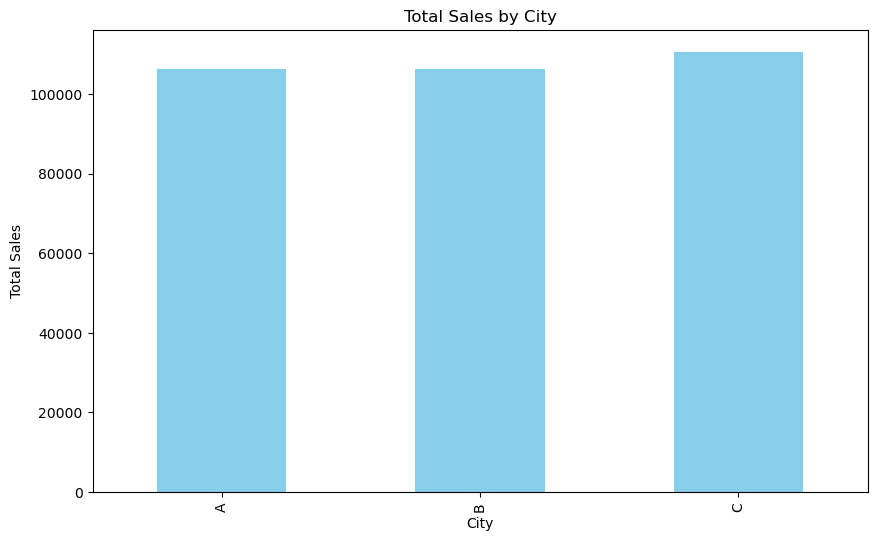

In [32]:
#creating barchat of total sales in each city
plt.figure(figsize=(10, 6))

branches_sales.plot(kind='bar', color='skyblue')
plt.title('Total Sales by City')
plt.xlabel('City')
plt.ylabel('Total Sales')
plt.show()

City
Mandalay     6.818072
Naypyitaw    7.072866
Yangon       7.027059
Name: Rating, dtype: float64


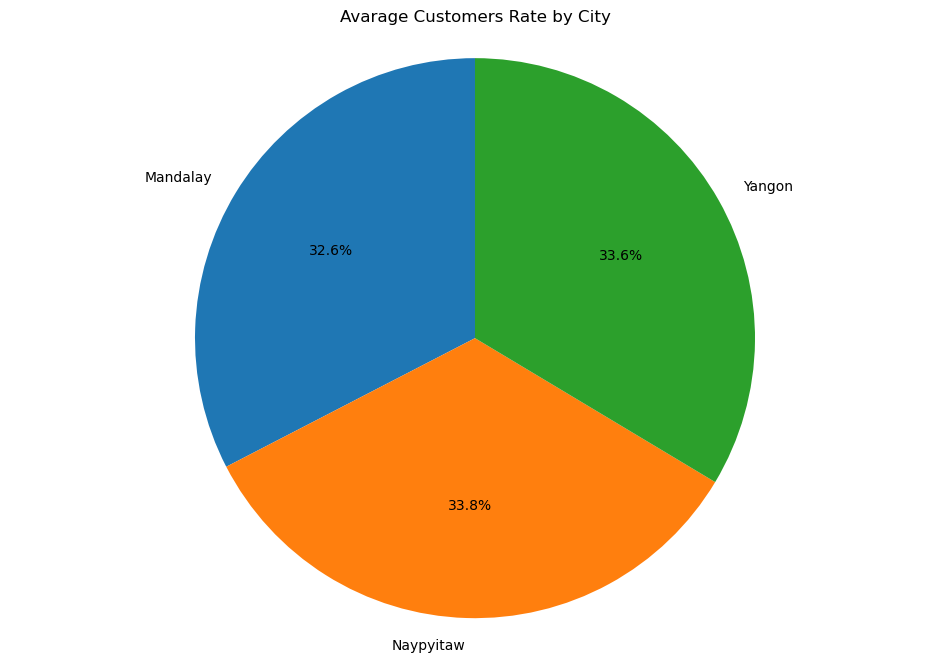

In [33]:
#creating a piechart of average customers differentiated by cities
customer_rate = data.groupby('City')['Rating'].mean()

cities = customer_rate.index
rates = customer_rate

print(customer_rate)

display_pie_chart(rates, cities, 'Avarage Customers Rate by City')


In [34]:
#Determining the highest selling product
product_sales = data.groupby('Product line')['Quantity'].sum()

highest_selling_product = product_sales.idxmax()

print("Highest selling product:", highest_selling_product)


Highest selling product: Electronic accessories


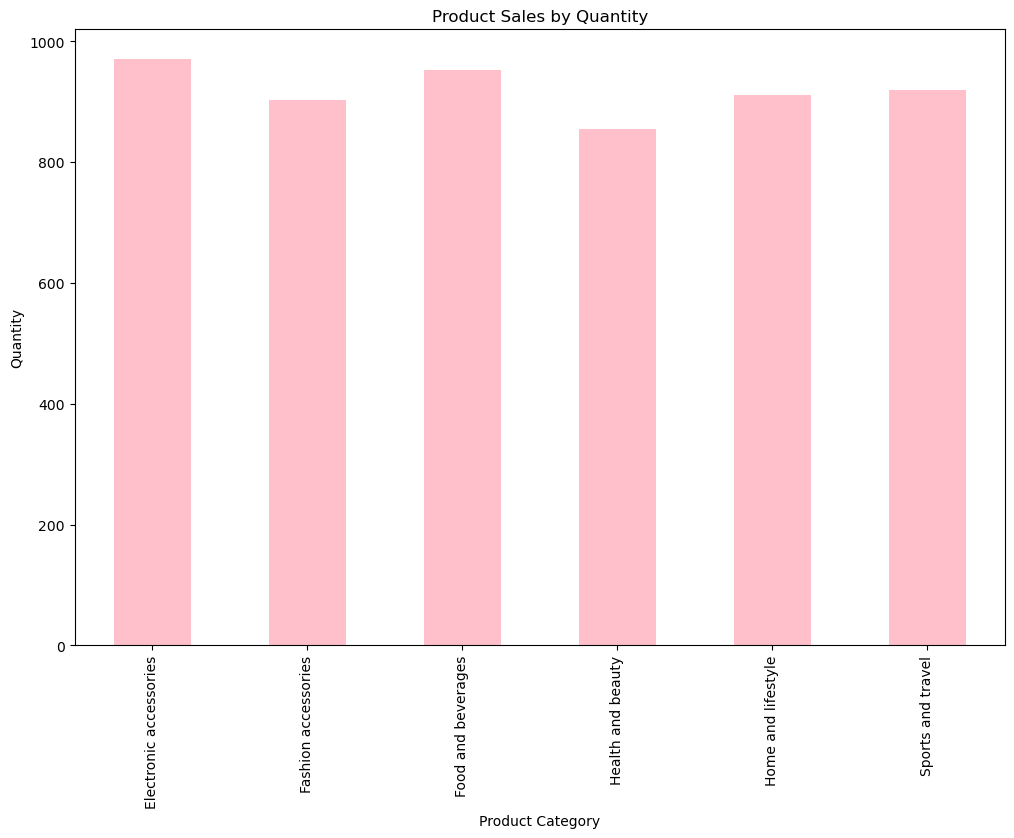

In [35]:
#Histogram on sales of each product
plt.figure(figsize=(12, 8))

product_sales.plot(kind='bar',color="pink")
plt.title('Product Sales by Quantity')
plt.xlabel('Product Category',  rotation=0)
plt.ylabel('Quantity')
plt.show()


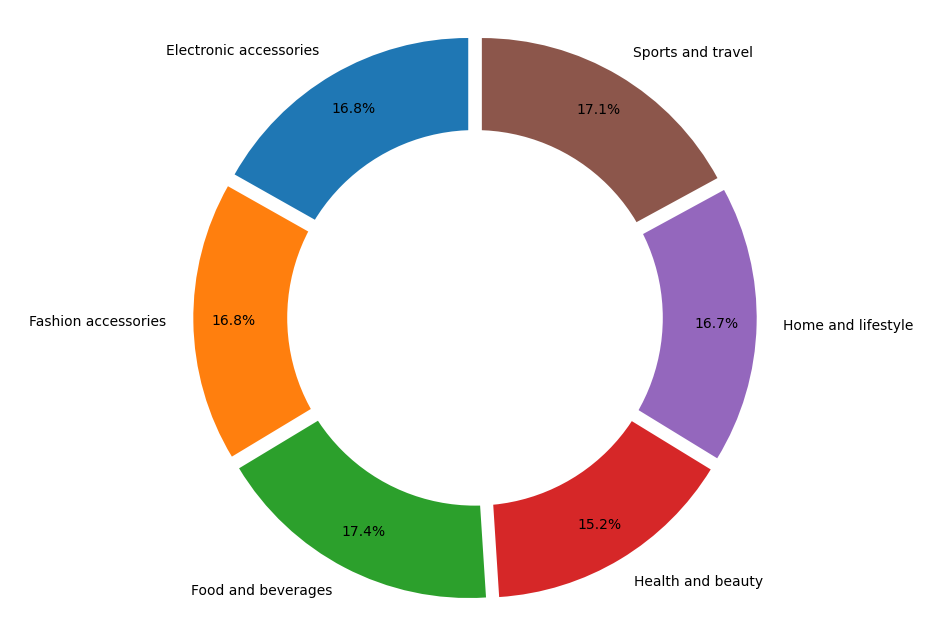

In [36]:
#creating a doughnat piechart
grouped_products = data.groupby('Product line')['gross income'].sum()

products = grouped_products.index
income = grouped_products

display_pie_chart(income, products, '', chart_type='doughnat')


In [37]:
#creating a dataframe
dates = pd.DataFrame()

In [38]:
# Convert Date values in dataset to pd.datetime object
dates['Date'] = pd.to_datetime(data['Date'])

In [39]:
# separate year value form datetime object
dates['Year'] = dates['Date'].dt.year


In [40]:
# separate month value form datetime object
dates['Month'] = dates['Date'].dt.month


In [41]:
# separate day value form datetime object
dates['Day'] = dates['Date'].dt.day


In [42]:
# Get Total column values from the original datafram 
dates['Total'] = data['Total']

In [43]:
dates

,Date,Year,Month,Day,Total
0,2019-01-05,2019,1,5,548.9715
1,2019-03-08,2019,3,8,80.2200
2,2019-03-03,2019,3,3,340.5255
3,2019-01-27,2019,1,27,489.0480
4,2019-02-08,2019,2,8,634.3785
...,...,...,...,...,...
995,2019-01-29,2019,1,29,42.3675
996,2019-03-02,2019,3,2,1022.4900
997,2019-02-09,2019,2,9,33.4320
998,2019-02-22,2019,2,22,69.1110


In [44]:
#determining the sales per month
monthly_sales = dates.groupby(['Month', 'Day'])['Total'].sum()

monthly_sales

Month  Day
1      1      4745.1810
       2      1945.5030
       3      2078.1285
       4      1623.6885
       5      3536.6835
                ...    
3      26     1962.5130
       27     2902.8195
       28     2229.4020
       29     4023.2430
       30     4487.0595
Name: Total, Length: 89, dtype: float64

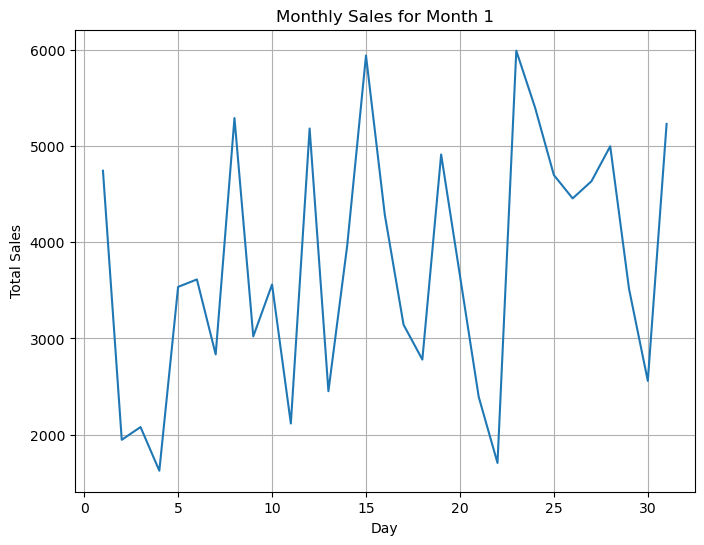

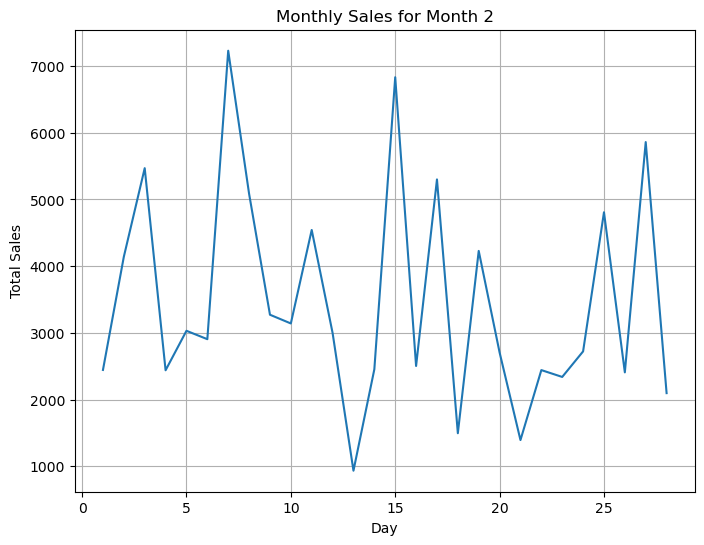

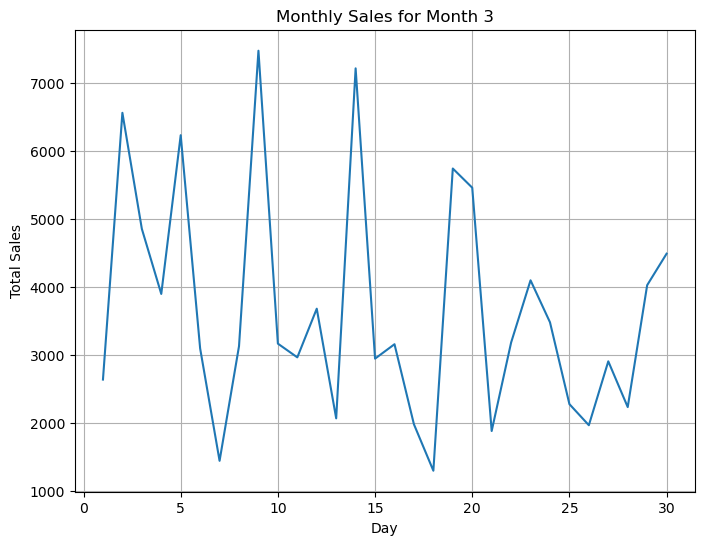

In [45]:
#visualization for each month of sales
for month in range(1, 4):
    plt.figure(figsize=(8, 6))
    month_data = monthly_sales.loc[month]
    plt.plot(month_data.index.get_level_values('Day'), month_data.values)
    plt.title(f'Monthly Sales for Month {month}')
    plt.xlabel('Day')
    plt.ylabel('Total Sales')
    plt.grid(True)
    plt.savefig(f'{month}')
    plt.show()